In [1]:
import yt
import cv2 as cv
import os
import numpy as np
import matplotlib.pyplot as plt
from argparse import ArgumentParser
from scipy.stats import linregress


In [2]:
def create_2d_plane_mask(x1, y1, x2, y2, z_range, resolution):
    """
    Create a 2D plane based on the user-defined line (x1, y1 -> x2, y2) and z-axis.
    Returns 2D arrays of X, Y, and Z coordinates.
    """
    # Generate points along the user-defined line
    
    x_vals = np.linspace(x1, x2, resolution, dtype=int)# np.abs(x2 - x1))
    y_vals = np.linspace(y1, y2, resolution, dtype=int) #np.abs(y2 - y1))

    # Create a meshgrid for Z-axis and line points
    z_vals = np.linspace(z_range[0], z_range[1], resolution, dtype=int)
    z_grid, line_grid = np.meshgrid(z_vals, np.arange(resolution), indexing='ij')
    

    # Repeat X and Y for each Z coordinate
    x_plane = np.tile(x_vals, (len(z_vals), 1))
    y_plane = np.tile(y_vals, (len(z_vals), 1))

    return x_plane, y_plane, z_grid

In [3]:
ds = yt.load('/home/joy0921/Desktop/Dataset/MHD-3DIS/hdf5/sn34_smd132_bx5_pe300_hdf5_plt_cnt_0420')

yt : [INFO     ] 2025-01-17 15:57:29,431 Parameters: current_time              = 6721863310591746.0
yt : [INFO     ] 2025-01-17 15:57:29,433 Parameters: domain_dimensions         = [  32   32 1280]
yt : [INFO     ] 2025-01-17 15:57:29,433 Parameters: domain_left_edge          = [-1.54283879e+21 -1.54283879e+21 -6.17135516e+22]
yt : [INFO     ] 2025-01-17 15:57:29,435 Parameters: domain_right_edge         = [1.54283879e+21 1.54283879e+21 6.17135516e+22]
yt : [INFO     ] 2025-01-17 15:57:29,436 Parameters: cosmological_simulation   = 0


In [5]:
center = [0, 0, 0] * yt.units.pc
arb_center = ds.arr(center, 'code_length')
left_edge = arb_center + ds.quan(-500, 'pc')
right_edge = arb_center + ds.quan(500, 'pc')
obj = ds.arbitrary_grid(left_edge, right_edge, dims=(256,) * 3)

In [7]:
dens = obj['flash', 'dens'].to('g/cm**3').value

In [9]:
img = np.log10(dens[:, :, 170])

In [10]:
img = np.log10(dens[:,:,170])

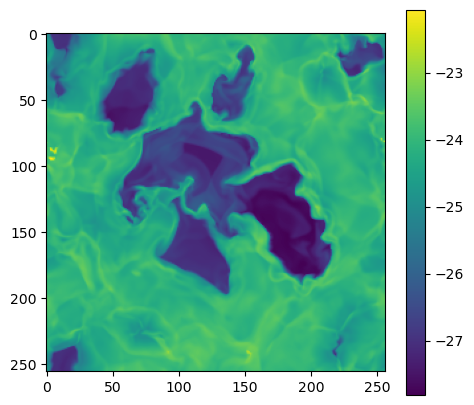

In [38]:
img.shape

(256, 256)

In [39]:
x_plane, y_plane, z_plane = create_2d_plane_mask(200,0,200,255, [0,255], 256)


In [46]:
x_plane.shape

(256, 256)

In [ ]:
y_plane

In [40]:
x_plane.shape

(256, 256)

In [41]:
dens[x_plane,y_plane,z_plane].shape

(256, 256)

In [47]:
dens.shape

(256, 256, 256)

In [53]:
img2 = np.log10(dens[x_plane[0][0],:,:])
img2.shape

(256, 256)

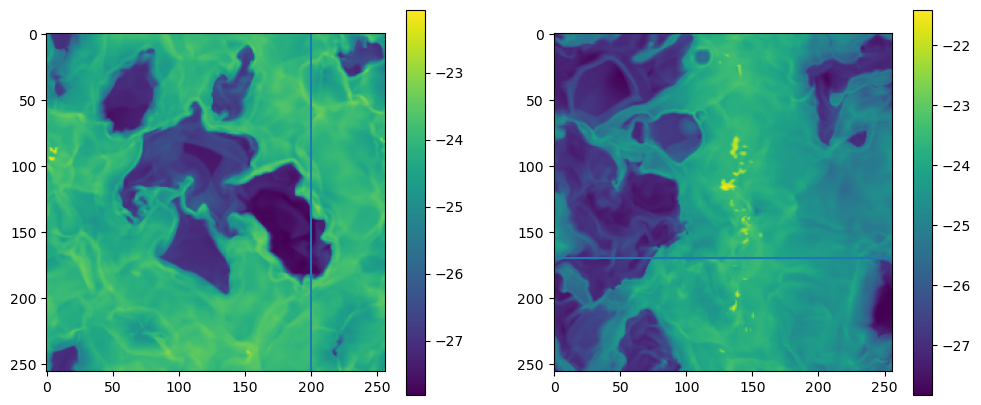

In [56]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,2,1)
im = ax.imshow(img)
ax.axvline(x=200)
fig.colorbar(im)

ax2 = fig.add_subplot(1,2,2)
im2=ax2.imshow(img2)
ax2.axhline(y=170)
fig.colorbar(im2)